In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, Bidirectional, LSTM, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
max_words=12000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [3]:
maxlen = 150

In [4]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [5]:
x_train[13]

array([ 3072,    19,    90,    88,    29,   385,    99,   946,     5,
         630,    34,  5330,    27,   668,  7698,   260,   383,    19,
          41,  3586,     5,    95, 11315,    41,    56,    75,    28,
           4,   554,    37,     9,  6866,     2,    34,    27,  8176,
           5,    37,   266,   344,     5,  3936,    27,  1633,    25,
          67,    45,    32,     2,   933,  3374,     4,    64,   542,
         561,    11,    14,  3388,  2446,     7,  5174,     9,    54,
           4,  1246,  1496,    27,  6256,     2,    45,     6,    52,
         155,    14,  2803,    16,   324,    23,   374,    88,   900,
          51,     6,   437,     7,  3269,    22,    12,    62,    30,
          48,    15,   232,    37,  1291,  2719,  3882,     8,    30,
         928,    11,    14,     2,     9,    66,   622,    57,   594,
          91,    84,   104,  2719,    26,  2140,    75,   219,    14,
        2320,    20,    95,   276,    23,  1456,   255,     4,  3612,
         449,    61,

In [6]:
experiment_epochs = 10

In [7]:
def run_pipeline(model, epochs):
    model.summary()
    
    model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

    history = model.fit(x_train, 
                    y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    validation_steps=3,
                    )
    
    plt.plot(history.history['accuracy'], 
         label='Accuracy Train')
    plt.plot(history.history['val_accuracy'], 
             label='Accuracy Val')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    scores = model.evaluate(x_test, y_test, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 150)         1800000   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               215040    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 2,015,297
Trainable params: 2,015,297
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 9s 381us/sample - loss: 0.4917 - accuracy: 0.7474 - val_loss: 0.0493 - val_accuracy: 0.8568
Epoch 2/10
22500/22500 [==============================] - 6s 273us/sample - loss: 0.2436 - accuracy: 0.9032 - val_loss: 0.0471 - val_accuracy: 0.8542
Epoch 3/10
22500/22500 [===

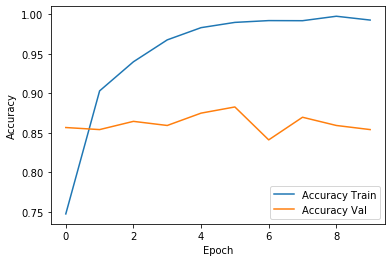

25000/25000 [==============================] - 4s 163us/sample - loss: 0.7321 - accuracy: 0.8355


In [8]:
model = Sequential([
    Embedding(max_words, maxlen),
    Bidirectional(GRU(128), merge_mode='concat'),
    Dense(1, activation='sigmoid')
])

run_pipeline(model, epochs=experiment_epochs)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 150)         1800000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               285696    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 2,085,953
Trainable params: 2,085,953
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 8s 373us/sample - loss: 0.4588 - accuracy: 0.7790 - val_loss: 0.0539 - val_accuracy: 0.8698
Epoch 2/10
22500/22500 [==============================] - 7s 298us/sample - loss: 0.2513 - accuracy: 0.9010 - val_loss: 0.0528 - val_accuracy: 0.8594
Epoch 3/10
22500/22500 [=

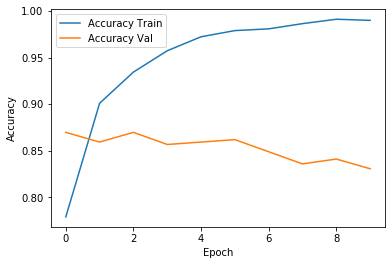

25000/25000 [==============================] - 5s 196us/sample - loss: 0.7542 - accuracy: 0.8436


In [9]:
model = Sequential([
    Embedding(max_words, maxlen),
    Bidirectional(LSTM(128), merge_mode='concat'),
    Dense(1, activation='sigmoid')
])

run_pipeline(model, epochs=experiment_epochs)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 150)         1800000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 256)         285696    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,512,961
Trainable params: 2,512,961
Non-trainable params: 0
____________________________________________

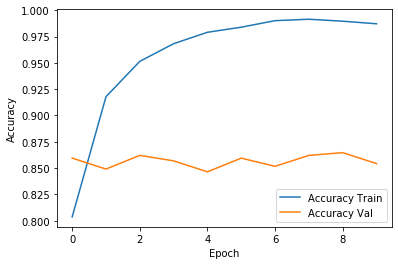

25000/25000 [==============================] - 8s 319us/sample - loss: 0.8505 - accuracy: 0.8324


In [10]:
model = Sequential([
    Embedding(max_words, maxlen),
    Bidirectional(LSTM(128, return_sequences=True), merge_mode='concat'),
    Bidirectional(LSTM(128), merge_mode='concat'),
    Dense(128, activation='elu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

run_pipeline(model, epochs=experiment_epochs)

In [11]:
embeddings_index = {}
with open("glove.840B.300d.txt", "r") as in_file:
    for line in in_file:
        values = line.split()
        try:
            word = values[0]
            embeddings_index[word] = np.asarray(values[1:], dtype=np.float32)
        except:
            pass

In [12]:
len(embeddings_index)

2195884

In [13]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
encoder = info.features['text'].encoder

In [14]:
train_dataset = train_dataset.shuffle(12000).padded_batch(128, padded_shapes=([None], []))
test_dataset = test_dataset.padded_batch(128, padded_shapes=([None], []))

In [15]:
import numpy as np

embedding_matrix = np.zeros((encoder.vocab_size, 300))

# 0 is used for padding in Keras
for index, word in enumerate(encoder.subwords, 1):
    word = word.lower()
    
    # lives_ ==> lives
    if word.endswith("_"):
        word = word[:-1]

    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 300)         2455500   
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 64)          85248     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,567,693
Trainable params: 112,193
Non-trainable params: 2,455,500
______________________________________

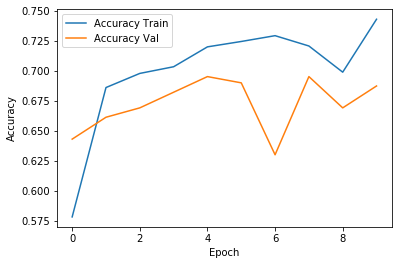

    196/Unknown - 28s 141ms/step - loss: 0.5709 - accuracy: 0.7032

In [17]:
model = Sequential([
    Embedding(encoder.vocab_size, 300, trainable=False),
    Bidirectional(LSTM(32, return_sequences=True), merge_mode='concat'),
    Bidirectional(LSTM(32), merge_mode='concat'),
    Dense(32, activation='elu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

model.summary()
    
model.compile(optimizer='adam', 
          loss='binary_crossentropy', 
          metrics=['accuracy'])

history = model.fit(
                train_dataset,
                epochs=10,
                validation_data=test_dataset,
                validation_steps=3,
                )

plt.plot(history.history['accuracy'], 
     label='Accuracy Train')
plt.plot(history.history['val_accuracy'], 
         label='Accuracy Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

scores = model.evaluate(test_dataset, verbose=1)